In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
 

from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('dataset.csv')


In [4]:
# Encoding our Labels
data['v1']=data['v1'].apply(lambda x: 1 if x=='spam' else 0)

In [5]:
import re
# preprocessing the Messages
def preprocess(data):
    new_data=[]

    for i in range(data.shape[0]):
        lines=data.iloc[i,1]
        # removing non alphabatic characters
        lines= re.sub('[^A-Za-z]',' ',lines)
        # lowering the every word
        lines=lines.lower()

        # tokenization
        tokenized_lines=word_tokenize(lines)

        # removing stop words ,stemming and spell correction
        processed_lines=[]
        for i in tokenized_lines:
            if i not in set(stopwords.words('english')):
                processed_lines.append(stemmer.stem(i))

        final_lines=' '.join(processed_lines)
        new_data.append(final_lines)
    return new_data

In [6]:
eval_df = pd.DataFrame(columns=['NGram', 'Accuracy','Precision','Recall','F1_Score'])
eval_df['NGram'] = ['n=1','n=2', 'n=3', 'n=4', 'n=5', 'n=6', 'n=7', 'n=8', 'n=9', 'n=10']

## n=1 Gram

In [7]:
#Unigram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = CountVectorizer(ngram_range=(1,1))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[0,'Accuracy'] = log_acc
eval_df.at[0,'Precision'] = log_prec
eval_df.at[0,'Recall'] = log_rec
eval_df.at[0,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[26  0]
 [ 5 19]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.79      0.88        24

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.90        50
weighted avg       0.92      0.90      0.90        50




## n=2 Gram

In [8]:
#Bigram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = CountVectorizer(ngram_range=(2,2))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[1,'Accuracy'] = log_acc
eval_df.at[1,'Precision'] = log_prec
eval_df.at[1,'Recall'] = log_rec
eval_df.at[1,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[23  0]
 [19  8]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        23
           1       1.00      0.30      0.46        27

    accuracy                           0.62        50
   macro avg       0.77      0.65      0.58        50
weighted avg       0.79      0.62      0.57        50




## n=3 Gram

In [9]:
#Trigram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(3,3))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[2,'Accuracy'] = log_acc
eval_df.at[2,'Precision'] = log_prec
eval_df.at[2,'Recall'] = log_rec
eval_df.at[2,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[21  0]
 [28  1]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        21
           1       1.00      0.03      0.07        29

    accuracy                           0.44        50
   macro avg       0.71      0.52      0.33        50
weighted avg       0.76      0.44      0.29        50




## n=4 Gram

In [10]:
#n-4gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(4,4))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[3,'Accuracy'] = log_acc
eval_df.at[3,'Precision'] = log_prec
eval_df.at[3,'Recall'] = log_rec
eval_df.at[3,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[24  0]
 [23  3]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        24
           1       1.00      0.12      0.21        26

    accuracy                           0.54        50
   macro avg       0.76      0.56      0.44        50
weighted avg       0.77      0.54      0.43        50




## n=5 Gram

In [11]:
#n-5gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(5,5))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[4,'Accuracy'] = log_acc
eval_df.at[4,'Precision'] = log_prec
eval_df.at[4,'Recall'] = log_rec
eval_df.at[4,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[24  0]
 [25  1]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        24
           1       1.00      0.04      0.07        26

    accuracy                           0.50        50
   macro avg       0.74      0.52      0.37        50
weighted avg       0.76      0.50      0.35        50




## n=6 Gram

In [12]:
#n-6gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(6,6))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[5,'Accuracy'] = log_acc
eval_df.at[5,'Precision'] = log_prec
eval_df.at[5,'Recall'] = log_rec
eval_df.at[5,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[26  0]
 [23  1]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        26
           1       1.00      0.04      0.08        24

    accuracy                           0.54        50
   macro avg       0.77      0.52      0.39        50
weighted avg       0.76      0.54      0.40        50




## n=7 Gram

In [13]:
#n-7gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(7,7))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[6,'Accuracy'] = log_acc
eval_df.at[6,'Precision'] = log_prec
eval_df.at[6,'Recall'] = log_rec
eval_df.at[6,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[26  0]
 [21  3]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        26
           1       1.00      0.12      0.22        24

    accuracy                           0.58        50
   macro avg       0.78      0.56      0.47        50
weighted avg       0.77      0.58      0.48        50




## n=8 Gram

In [14]:
#n-8gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(8,8))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[7,'Accuracy'] = log_acc
eval_df.at[7,'Precision'] = log_prec
eval_df.at[7,'Recall'] = log_rec
eval_df.at[7,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[21  0]
 [25  4]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        21
           1       1.00      0.14      0.24        29

    accuracy                           0.50        50
   macro avg       0.73      0.57      0.43        50
weighted avg       0.77      0.50      0.40        50




## n=9 Gram

In [15]:
#n-9gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(9,9))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[8,'Accuracy'] = log_acc
eval_df.at[8,'Precision'] = log_prec
eval_df.at[8,'Recall'] = log_rec
eval_df.at[8,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[20  0]
 [27  3]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        20
           1       1.00      0.10      0.18        30

    accuracy                           0.46        50
   macro avg       0.71      0.55      0.39        50
weighted avg       0.77      0.46      0.35        50




## n=10 Gram

In [16]:
#n-10gram Modelling and Vectorization
new_data = preprocess(data)
vectorizer = TfidfVectorizer(ngram_range=(10,10))
new_data = vectorizer.fit_transform(new_data)

## Logistic Regression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,data['v1'],test_size=0.25)

logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
log_acc = accuracy_score(Y_test,Y_pred) * 100
log_conf = confusion_matrix(Y_test,Y_pred)
log_class = classification_report(Y_test,Y_pred)
log_prec = precision_score(Y_test,Y_pred)
log_rec = recall_score(Y_test,Y_pred)
log_fscore = f1_score(Y_test,Y_pred)
eval_df.at[9,'Accuracy'] = log_acc
eval_df.at[9,'Precision'] = log_prec
eval_df.at[9,'Recall'] = log_rec
eval_df.at[9,'F1_Score'] = log_fscore
print("Confusion Matrix - \n{}\nClassification Report - \n{}\n".format(log_conf,log_class))

Confusion Matrix - 
[[25  0]
 [22  3]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        25
           1       1.00      0.12      0.21        25

    accuracy                           0.56        50
   macro avg       0.77      0.56      0.45        50
weighted avg       0.77      0.56      0.45        50




In [17]:
eval_df

,NGram,Accuracy,Precision,Recall,F1_Score
0,n=1,90.0,1.0,0.791667,0.883721
1,n=2,62.0,1.0,0.296296,0.457143
2,n=3,44.0,1.0,0.034483,0.066667
3,n=4,54.0,1.0,0.115385,0.206897
4,n=5,50.0,1.0,0.038462,0.074074
5,n=6,54.0,1.0,0.041667,0.08
6,n=7,58.0,1.0,0.125,0.222222
7,n=8,50.0,1.0,0.137931,0.242424
8,n=9,46.0,1.0,0.1,0.181818
9,n=10,56.0,1.0,0.12,0.214286


[]

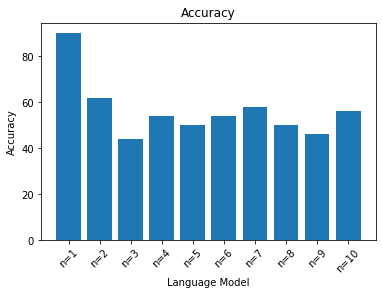

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(eval_df['NGram'],eval_df['Accuracy'])
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Language Model')
plt.ylabel('Accuracy')
plt.plot()

[]

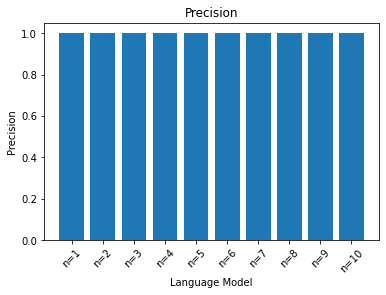

In [19]:
plt.bar(eval_df['NGram'],eval_df['Precision'])
plt.title('Precision')
plt.xticks(rotation=45)
plt.xlabel('Language Model')
plt.ylabel('Precision')
plt.plot()

[]

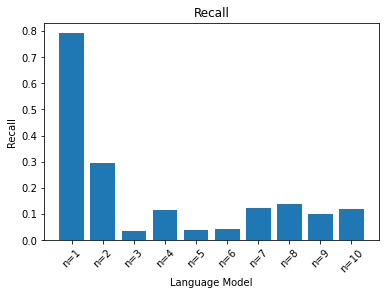

In [20]:
plt.bar(eval_df['NGram'],eval_df['Recall'])
plt.title('Recall')
plt.xticks(rotation=45)
plt.xlabel('Language Model')
plt.ylabel('Recall')
plt.plot()

[]

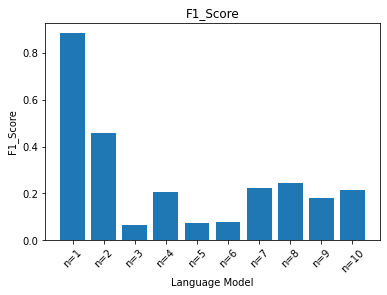

In [21]:
plt.bar(eval_df['NGram'],eval_df['F1_Score'])
plt.title('F1_Score')
plt.xticks(rotation=45)
plt.xlabel('Language Model')
plt.ylabel('F1_Score')
plt.plot()